#### Neirest Neighbir con reducción de la base
Carlos Cornielle

In [173]:
import pandas as pd
import numpy as np
from scipy import linalg
import random
from scipy.spatial import distance
import scipy.spatial
from collections import Counter
from scipy.stats import norm
import random
import matplotlib.pyplot as plt
from statistics import mode 
import sys
import warnings
from matplotlib.pyplot import *

Clase para clasificar mediante K-NN

In [163]:
class KNN:
    def __init__(self, k):
        self.k = k
            
    def predict(self, X_train):
        final_output = []
        for i in range(len(X_train)):
            d = []
            votes = []
            for j in range(len(z)):
                    dist= np.sqrt(np.sum((z[j]-X_train[i])**2).astype(float))
                    d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(z_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_train, y_train):
        predictions = self.predict(X_train)
        porcen= (predictions == y_train).sum() / len(y_train)
        boleano = predictions == y_train
        return porcen,boleano

Se importa el data set de MPG

In [4]:
df = pd.read_excel("Dataset_MPG1.xlsx", sheet_name='Dataset_MPG', header = None, dtype = float) # Carga del set de datos
df_values= df.values
df

,0,1,2,3,4,5,6,7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


Se hace una separación de las clases en 10 clases utilizando 10 rangos igualmente espaciados de MPG

In [5]:
df_mpg = df_values[:,0]
mpg = df_mpg.copy()
mpg_min = min(mpg)
mpg_max = max(mpg)
grupos = np.linspace(mpg_min,mpg_max,10)
grupos

array([ 9.        , 13.17777778, 17.35555556, 21.53333333, 25.71111111,
       29.88888889, 34.06666667, 38.24444444, 42.42222222, 46.6       ])

In [6]:
mpg[mpg<grupos[1]] =1
mpg[np.logical_and(mpg>=grupos[1], mpg<grupos[2])] = 2
mpg[np.logical_and(mpg>=grupos[2], mpg<grupos[3])] = 3
mpg[np.logical_and(mpg>=grupos[3], mpg<grupos[4])] = 4
mpg[np.logical_and(mpg>=grupos[4], mpg<grupos[5])] = 5
mpg[np.logical_and(mpg>=grupos[5], mpg<grupos[6])] = 6
mpg[np.logical_and(mpg>=grupos[6], mpg<grupos[7])] = 7
mpg[np.logical_and(mpg>=grupos[7], mpg<grupos[8])] = 8
mpg[np.logical_and(mpg>=grupos[8], mpg<grupos[9])] = 9
mpg[mpg>=grupos[9]] = 10

In [7]:
df_group = df_values.copy()
df_features = df_group[:,1:8]
df_group[:,0] =mpg
df_group.shape

(398, 8)

Función para realizar la permutación de la data

In [8]:
# Funcion para realizar la permutacion de los datos
def permutacion(train_size,semilla,f):
    np.random.seed(semilla)
    idx= np.random.rand(len(df_group))<train_size
   
    train = df_group[idx]
    train= np.array(train)
    train_mpg = train[:,0]
    train_x= train[:,1:f]
    
    test = df_group[~idx]
    test= np.array(test)
    test_mpg = test[:,0]
    test_x= test[:,1:f]
    
    return train_mpg,train_x, test_mpg,test_x,idx

In [185]:
train_size= 0.74
semilla=500
f=8
y_train,X_train,y_test,X_test,idx = permutacion(train_size,semilla,f)

Después de segmentar los datos en train y test se creará una nueva variable z que corresponderá a la nueva matriz de CNN 

In [186]:
z=[] #Matriz vacía que va a componer los datos de CNN
z_train= [] #Matriz vacía que va a componer los datos de CNN para la variable mpg (objetivo)

In [187]:
z= X_train[0,:] # Se pasa la primera fila para comenzar con el cnn
z= np.reshape(z, (1, 7)) #Se le da la forma que se desea
z_train = y_train[0]
z_train= np.reshape(z_train, (1)) #Se le da la forma que se desea
z_train.shape

(1,)

In [188]:
clf = KNN(1) # Primera corrida del algoritmo con un solo valor de Z
a,b=clf.score(X_train,y_train)
a

0.2080536912751678

In [200]:
clf = KNN(1) # Se indica que el K-NN se hara con K=1
flag = True # se inicializa el flag
i=0 # Se inicializa la variable i

while flag: #Mientras el flag sea True el ciclo seguirá ejecuntadose
    
    a, b=clf.score(X_train,y_train) # Esta funcion realiza el K-NN 
    if b[i] == False: # si el valor en la posicion i  es false significa que no se clasifico bien 
        new= X_train[i,:] # Paso la fila de train que fallo al clasificarse
        new_y = y_train[i] # Asi como su posicion en y
        new= np.reshape(new, (1, 7)) # se le da la forma. 1 fila y 7 columnas
        new_y= np.reshape(new_y, (1)) # nos aseguramos de que tenga la forma deseada, un escalar
        z= np.concatenate((z, new)) # Se concatena z con la fila que fallo 
        z_train= np.concatenate((z_train, new_y)) # Se concatena la parte mpg de z con el mpg de la fila que fallo 
        X_train = np.delete(X_train, i, 0) # Se elimina la fila que fallo del train set
        y_train = np.delete(y_train, i, 0) # Se elimina el mpg que fallo del train set
        i=0 # se comienza a probar los errores nueva vez
    else:
        i=i+1 # se aumenta en 1 para seguir analizando las demas posicion
    if a == 1.0:
        flag = False
        


La matriz "a" muestra la tasa de acierto de la matriz z y el train set mientras que la matriz "b" es una matriz de true and false que indica que filas fallaron al tratar de clasificarse 

Se pasa la variable z a z_cnn para guardar estos datos y poder comparar los resultados de su clasificación mas adelante asi como la variable ojetivo que corresponde a las filas utilizadas en z

In [201]:
a

1.0

In [45]:
z_cnn = z
z_train_cnn = z_train

Prueba de este set reducido con el set de pruebas 

In [160]:
z =z_cnn.copy()
z_train = z_train_cnn.copy()
clf = KNN(11) # Se indica que el K-NN se hara con K=11
a, b=clf.score(X_test,y_test) # Esta funcion realiza el K-NN 
a1=a
a1

0.43

La tasa de aciertos fue de 43%

Con otra permutación de elos datos se le pasan los datos obtenidos a una variable para volver a iterar y observar con otra permutación distinta de los datos

In [36]:
z_cnn_2 = z
z_train_cnn2 = z_train

In [136]:
z =z_cnn_2.copy()
z_train = z_train_cnn2.copy()
clf = KNN(11) # Se indica que el K-NN se hara con K=11
a, b=clf.score(X_test,y_test) # Esta funcion realiza el K-NN 
a2=a
a2

0.47

La tasa de aciertos fue de 47%

Guardar la otra permutacion

In [63]:
z_cnn_3 = z
z_train_cnn3 = z_train

In [137]:
z =z_cnn_3.copy()
z_train = z_train_cnn3.copy()
clf = KNN(11) # Se indica que el K-NN se hara con K=11
a, b=clf.score(X_test,y_test) # Esta funcion realiza el K-NN 
a3=a
a3

0.36

Se hace otra prueba pero con una menor cantidad de datos en el train set, se obtuvo un se de cnn de 169 filas y este es 100% compatible con el set de train original reducino que es de 299

In [16]:
z_cnn_4 = z
z_train_cnn4 = z_train

(168, 7)

In [139]:
z =z_cnn_4.copy()
z_train = z_train_cnn4.copy()
clf = KNN(11) # Se indica que el K-NN se hara con K=11
a, b=clf.score(X_test,y_test) # Esta funcion realiza el K-NN 
a4=a
a4

0.41

A pesar de que no se logró una gran reducción esto puede ser de gran ayuda para algoritmos que su eficiencia dependa mucho de la cantidad de datos o features como es el caso de K-NN, observando de que en algunos de los casos además de reducir la cantidad de data del set, se logró mejor estimación utilizando el algoritmo de K-NN debido a que el condensed nearest neighbor busca mantener la información mínima necesaria para clasificar cada una de las clases, esto dependiendo del set que se utilize da reportes como el obtenido en el que la tasa de aciertos aumenta, es normal que en algunas aplicaciones los algoritmos modelen mejor el comportamiento con menos data, ya que cuando se tiene mucha data sin tratar esta puede tener mucha información redudante o innecesaria por lo que el algoritmo también se aprende esta data redudante e innecesaria.

Comparacion con el set de entrenamiento completo para observar la tasa de aciertos de este con respecto al set de pruebas

In [121]:
train_size= 0.734
semilla=1001
f=8
y_train,X_train,y_test,X_test,idx = permutacion(train_size,semilla,f)


In [120]:
z = X_train.copy()
z_train = y_train.copy()
clf = KNN(11) # Se indica que el K-NN se hara con K=7
a, b=clf.score(X_test,y_test) # Esta funcion realiza el K-NN 
a_orig = a

0.43

Con la segunda permutación de CNN se consiguió la mayor tasa de aciertos (47%) superando aún el 43% obtenido con todo el set de entrenamiento, gracias a que se eliminó data redudante dentro del set que impedía clasificar de manera correcta parte de la data del set de pruebas.

Gráfica para mostrar las tasas de acierto de las distintas permutaciones y una versión reducida del train set

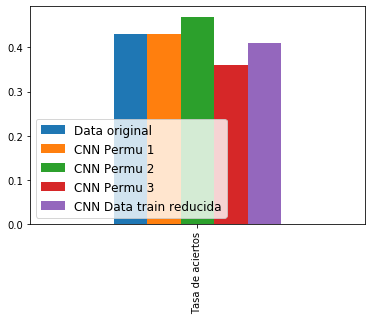

In [204]:
fig, ax = subplots()
df_histo = pd.DataFrame({'a':a1, 'a1':a1,'a2':a2, 'a3':a3, 'a4':a4}, index=['Tasa de aciertos'])
df_histo.plot(kind='bar', ax=ax)
ax.legend(["Data original", "CNN Permu 1","CNN Permu 2", "CNN Permu 3","CNN Data train reducida"],loc=3, fontsize=12);

Espacio de memoria ocupado 

In [206]:
local_vars = list(locals().items())
for var, obj in local_vars:
    print(var, sys.getsizeof(obj))

__name__ 57
__doc__ 113
__package__ 16
__loader__ 16
__spec__ 16
__builtin__ 80
__builtins__ 80
_ih 1928
_oh 4704
_dh 72
In 1928
Out 4704
get_ipython 64
exit 56
quit 56
_ 32
__ 32
___ 32
_i 145
_ii 318
_iii 318
_i1 82
_i2 344
pd 80
np 80
linalg 80
random 80
distance 80
scipy 80
Counter 1056
norm 56
plt 80
mode 136
time 80
timeit 80
_i3 856
KNN 1056
_i4 193
df 25624
df_values 112
_4 25624
_i5 178
df_mpg 96
mpg 3280
mpg_min 32
mpg_max 32
grupos 96
_5 96
_i6 535
_i7 140
df_group 25584
df_features 112
_7 64
_i8 487
permutacion 136
_i9 164
train_size 24
semilla 28
f 28
y_train 360
X_train 1960
y_test 96
X_test 112
idx 494
_9 64
_i10 368
z 15008
z_train 2224
_i11 233
_11 56
_i12 172
clf 56
a 32
b 129
end_time 24
_12 32
_i13 2525
flag 24
i 28
new 112
new_y 96
_i14 56
_14 64
_i15 52
_15 64
_i16 97
z_cnn_4 9520
z_train_cnn4 1440
_16 64
_i17 164
_17 64
_i18 164
_18 64
_i19 368
_i20 233
_20 56
_i21 172
_21 32
_i22 2525
_i23 56
_23 64
_i24 52
_24 64
_i25 80
z_cnn 13048
z_train_cnn 1944
_i26 82
_26